### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-11,367081,3785332,599385,484235,229823,128148,126924,123568,110506,89821,80501,94615,81796,4846,188100
2021-06-12,370384,3795087,599664,486272,230097,128160,126976,123961,110540,89841,80501,95192,81911,4846,188100
2021-06-13,374305,3804234,599775,487401,230150,128168,127002,124314,110553,89849,80501,95778,82098,4846,188708
2021-06-14,377031,3812116,599946,488228,230187,128171,127038,124681,110616,89944,80517,96366,82217,4846,188708
2021-06-15,379573,3822698,600285,490696,230428,128181,127101,125055,110692,90079,80579,96965,82351,4846,189261


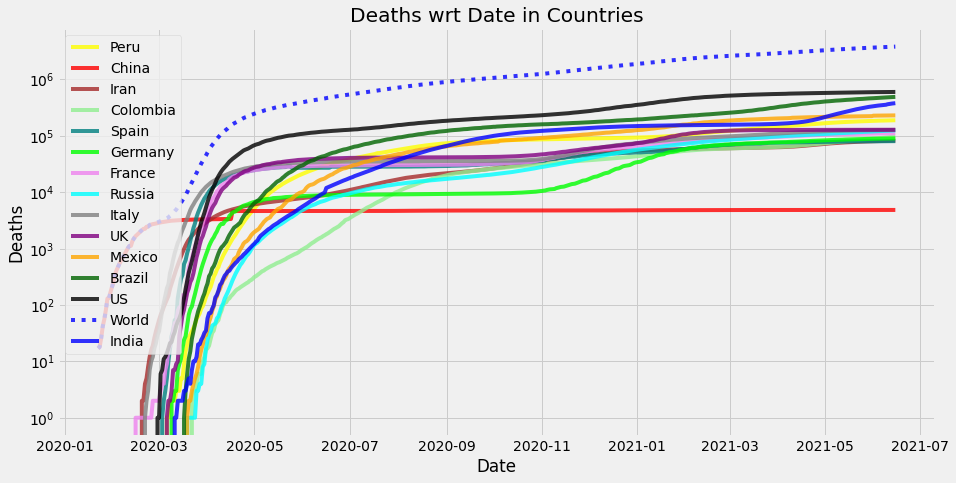

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-11,84332,421258,24704,85149,3282,7960,1892,12361,3879,2194,4142,29570,9966,35,2799
2021-06-12,80834,371882,8207,78700,3649,7552,1722,13360,3972,1484,0,29998,7444,37,0
2021-06-13,70421,302916,4775,37948,1707,7334,1390,14561,2855,1000,0,28519,8195,23,5569
2021-06-14,60471,308540,12752,39846,1175,7621,907,13550,698,873,8167,24376,10715,21,0
2021-06-15,62224,371330,11304,80609,4250,7594,1253,14002,3243,1160,3432,24452,10216,23,3852


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-11,169439,489571,21983,64842,2759,4427,3952,9323,4070,5362,5217,22617,10737,23,4463
2021-06-12,163532,481725,21064,65766,2819,4635,3804,9592,4064,5103,4869,23109,10517,24,4166
2021-06-13,157325,469805,19978,63911,2745,4815,3643,9923,3983,4830,4544,23470,10363,24,4259
2021-06-14,150868,459054,19496,62307,2640,5002,3460,10165,3764,4566,4786,23530,10386,24,3975
2021-06-15,144958,453205,18950,63527,2747,5175,3313,10421,3729,4339,4696,23592,10375,23,3967


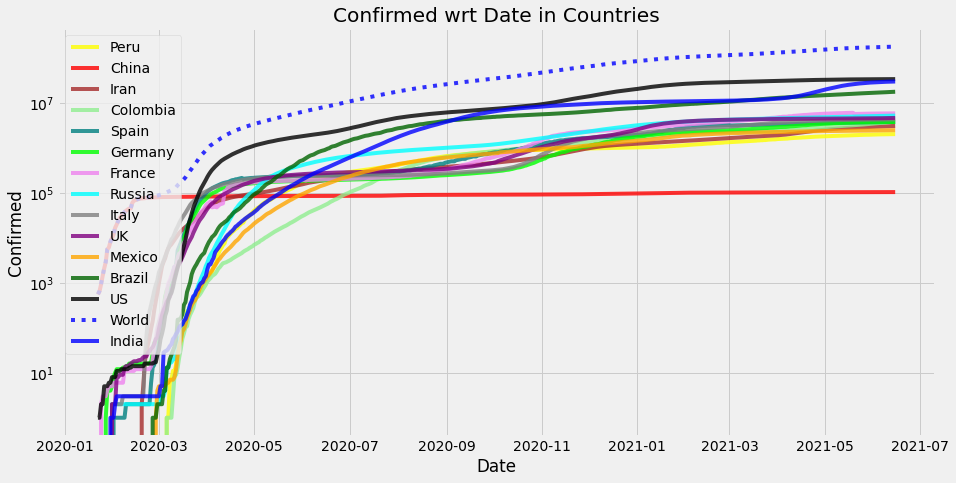

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-11,4002,11929,646,2216,243,17,69,390,74,128,36,569,124,0,253
2021-06-12,3303,9755,279,2037,274,12,52,393,34,20,0,577,115,0,0
2021-06-13,3921,9147,111,1129,53,8,26,353,13,8,0,586,187,0,608
2021-06-14,2726,7882,171,827,37,3,36,367,63,95,16,588,119,0,0
2021-06-15,2542,10582,339,2468,241,10,63,374,76,135,62,599,134,0,553


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-11,3495.10,11160.65,464.05,1951.15,339.19,9.20,86.12,372.68,83.12,116.97,49.84,528.58,162.58,0.0,401.09
2021-06-12,3471.09,10984.95,440.91,1961.88,331.04,9.55,81.86,375.22,76.98,104.85,43.61,534.63,156.63,0.0,350.96
2021-06-13,3527.33,10755.20,399.68,1857.77,296.29,9.36,74.88,372.44,68.98,92.74,38.16,541.05,160.43,0.0,383.09
2021-06-14,3427.16,10396.05,371.09,1728.92,263.87,8.56,70.02,371.76,68.23,93.02,35.39,546.92,155.25,0.0,335.20
2021-06-15,3316.52,10419.30,367.08,1821.31,261.02,8.74,69.14,372.04,69.20,98.27,38.72,553.43,152.59,0.0,362.43


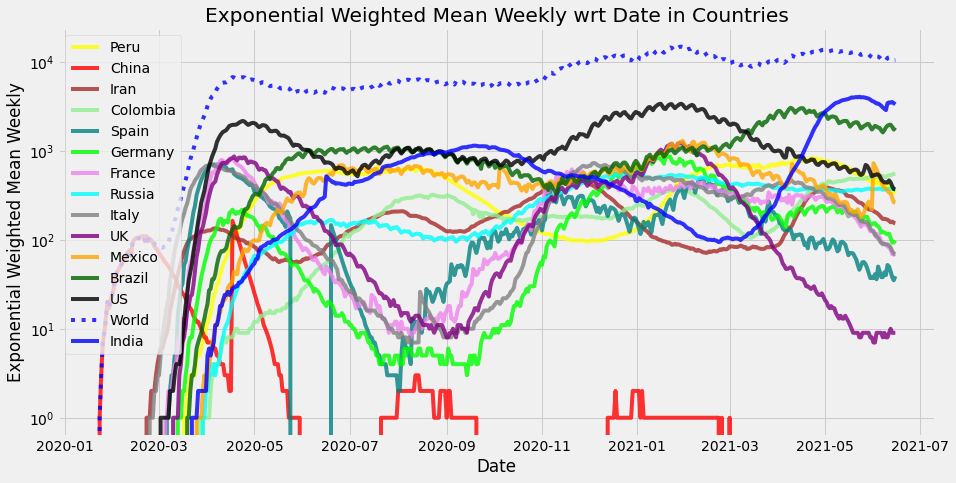

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

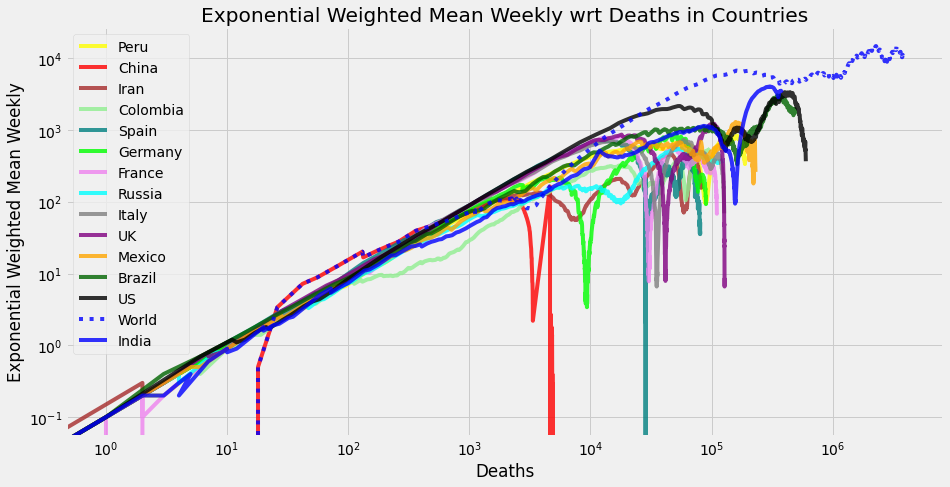

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

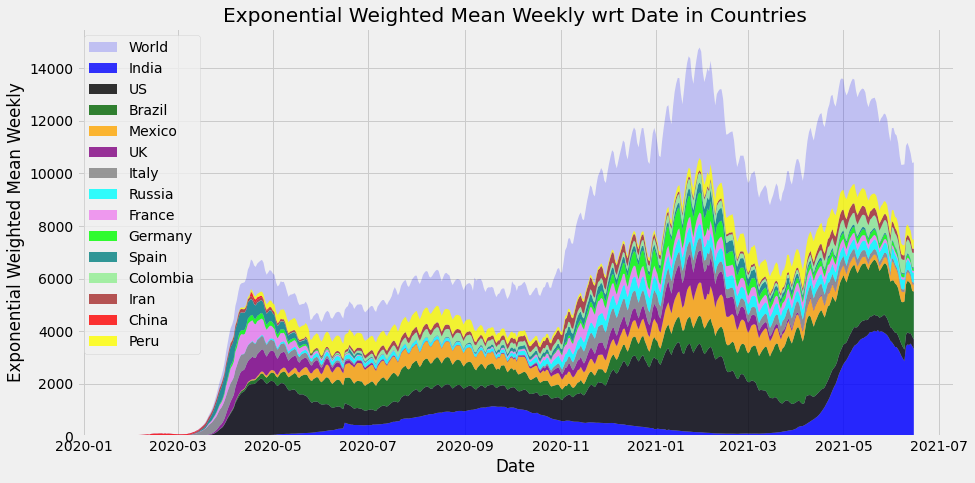

In [20]:
stackplotter(AVG, name)

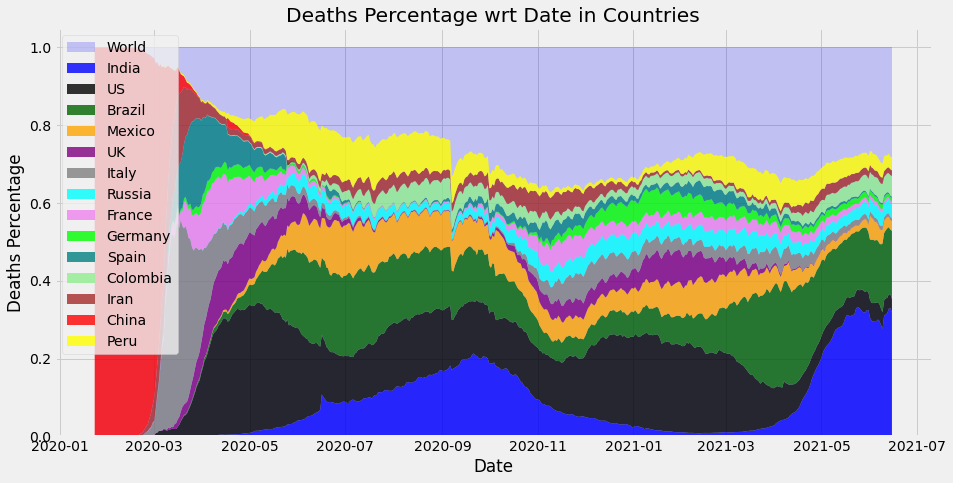

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

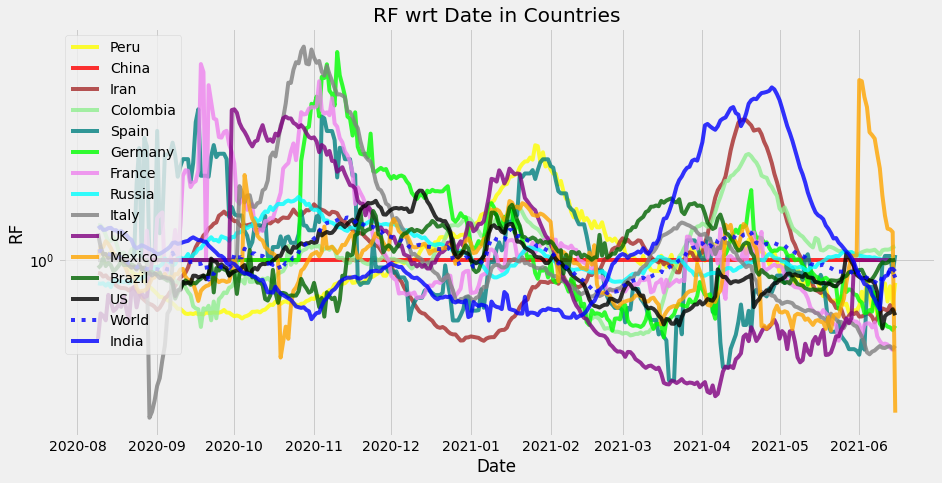

In [23]:
plotter(Reproductivity[200:], 'RF')

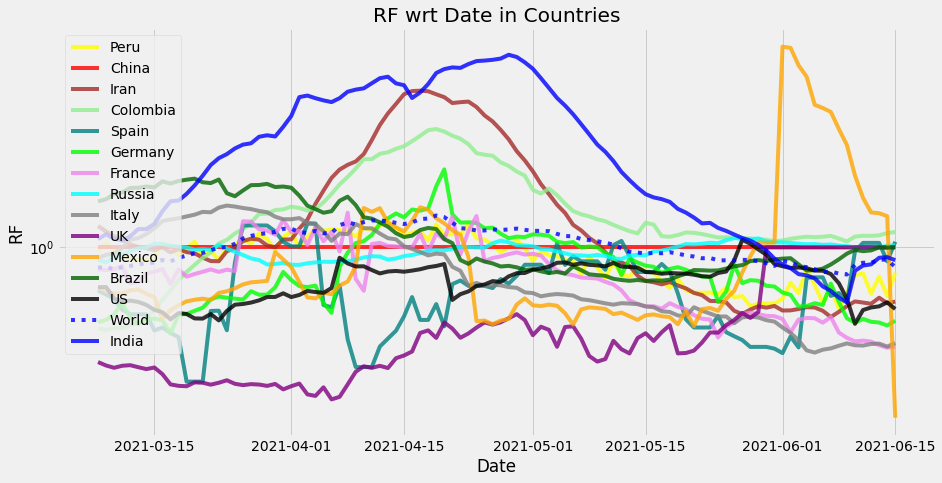

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

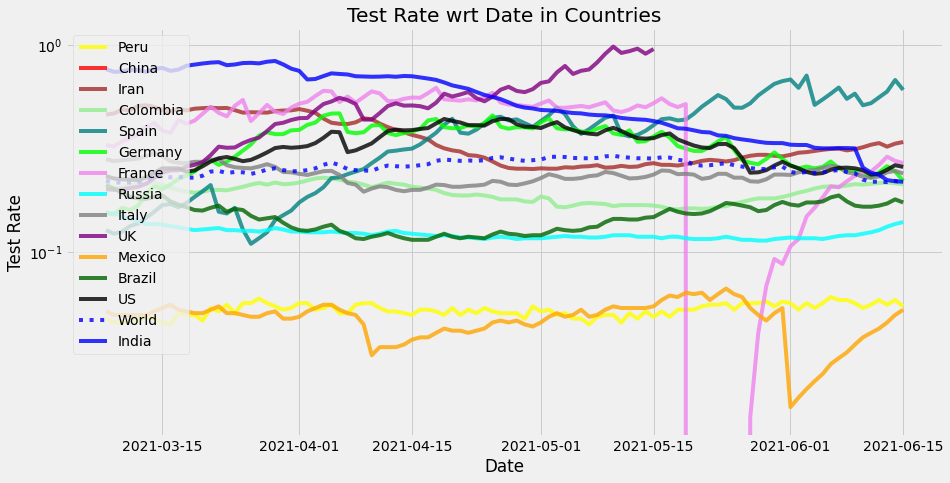

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

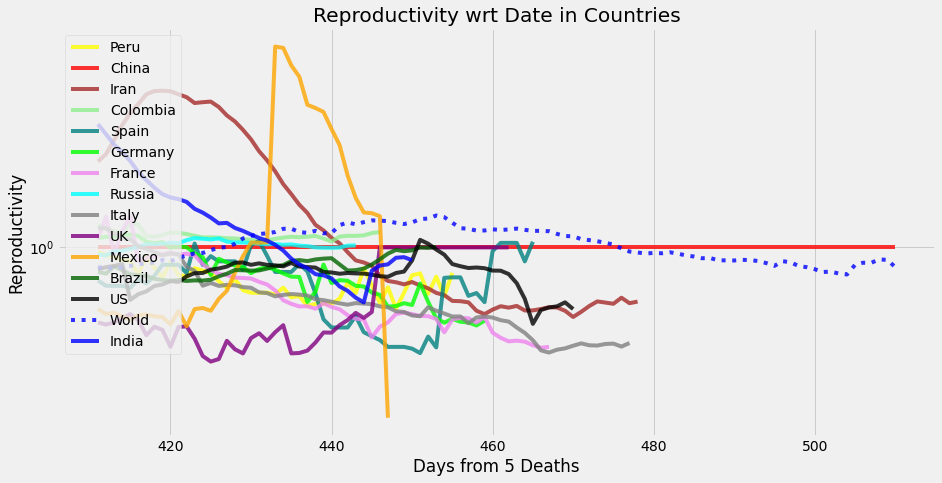

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

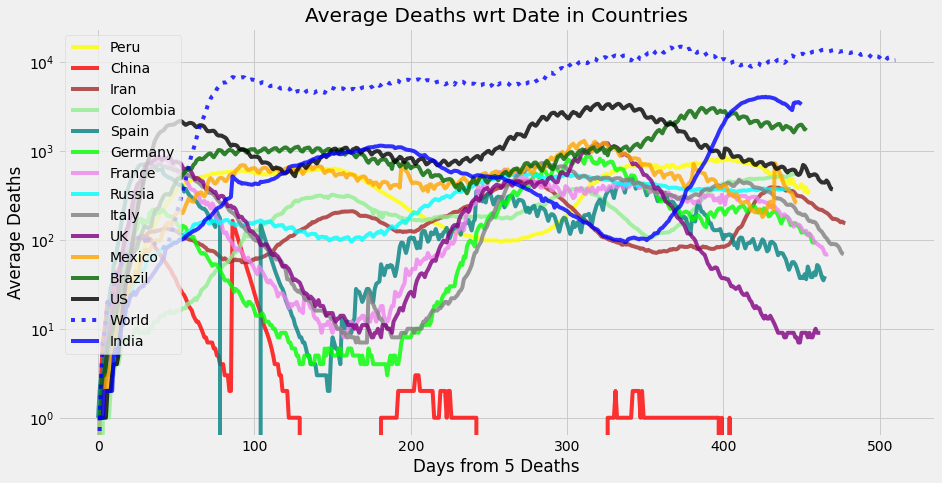

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

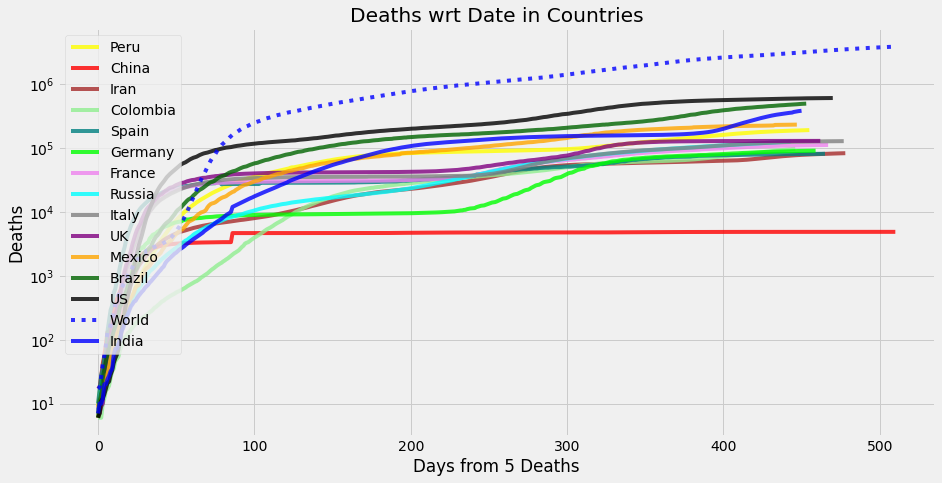

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3822698,10582,10821.29,10419.30,0.8890,176643833,0.217,453205,764.54
US,600285,339,344.00,367.08,0.6908,33486038,0.258,18950,120.06
Brazil,490696,2468,1986.29,1821.31,1.0024,17533221,0.174,63527,98.14
India,379573,2542,3720.71,3316.52,0.9263,29633105,0.219,144958,75.91
Mexico,230428,241,189.71,261.02,0.3598,2459601,0.053,2747,46.09
Peru,189261,553,357.71,362.43,0.8584,2007477,0.055,3967,37.85
UK,128181,10,9.00,8.74,1.0000,4596994,NaN,5175,25.64
Italy,127101,63,58.71,69.14,0.5634,4247032,0.240,3313,25.42
Russia,125055,374,378.00,372.04,1.0121,5176051,0.140,10421,25.01


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3822698,10582,10821.29,10419.30,0.8890,176643833,0.217,453205,764.54
India,379573,2542,3720.71,3316.52,0.9263,29633105,0.219,144958,75.91
Brazil,490696,2468,1986.29,1821.31,1.0024,17533221,0.174,63527,98.14
Colombia,96965,599,577.43,553.43,1.0969,3802052,0.213,23592,19.39
Argentina,86615,586,564.00,553.95,1.0922,4172742,0.234,25902,17.32
Russia,125055,374,378.00,372.04,1.0121,5176051,0.140,10421,25.01
Peru,189261,553,357.71,362.43,0.8584,2007477,0.055,3967,37.85
US,600285,339,344.00,367.08,0.6908,33486038,0.258,18950,120.06
Mexico,230428,241,189.71,261.02,0.3598,2459601,0.053,2747,46.09


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3822698


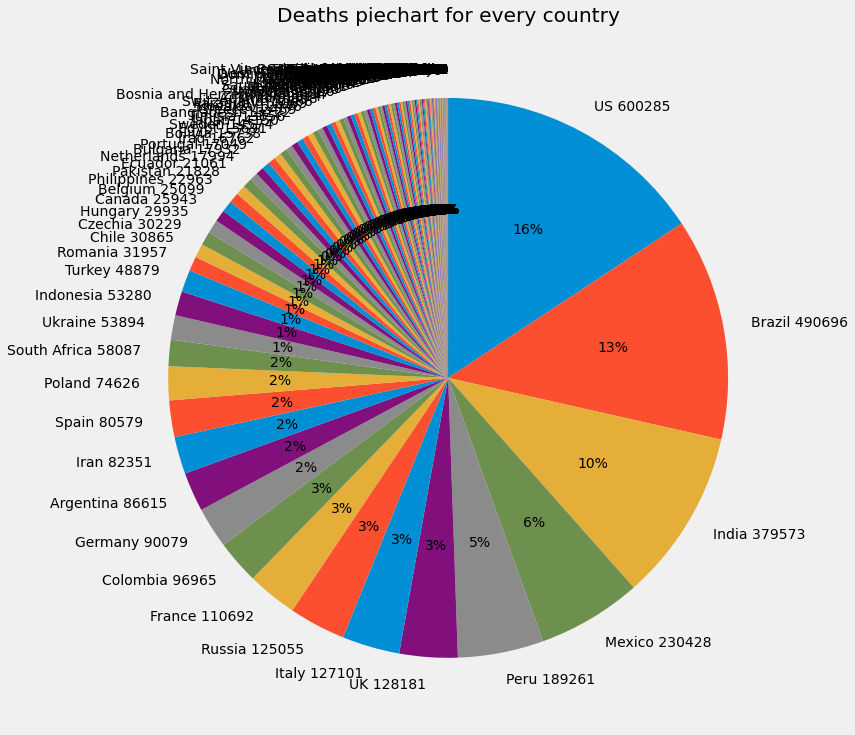

In [35]:
piechart('Deaths')

World total:  10821


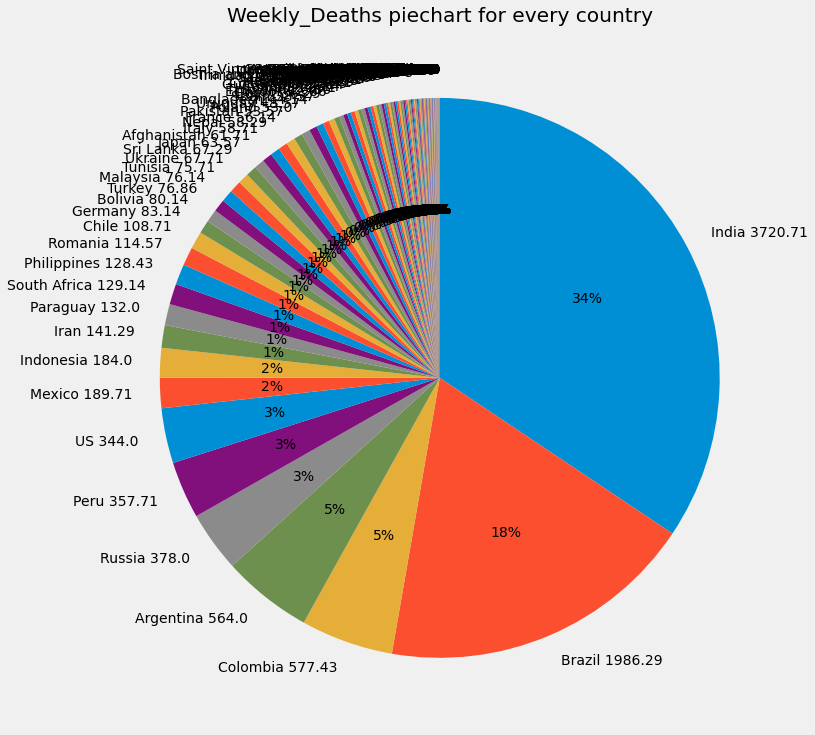

In [36]:
piechart('Weekly_Deaths')

World total:  10582


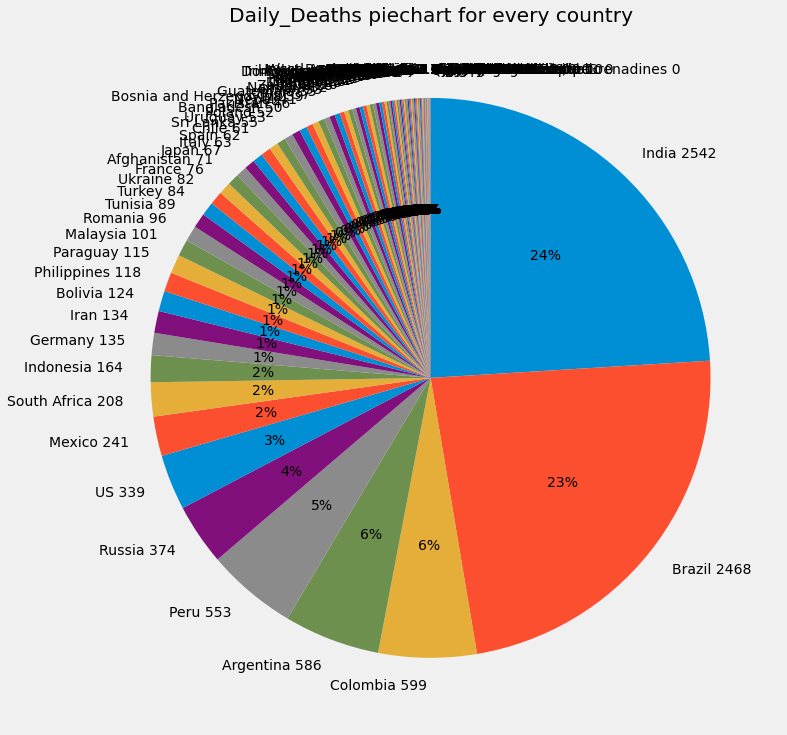

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-06-16


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

764539600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 3f1955f] `date` update
 1 file changed, 2125 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)


To https://github.com/Arrowheadahp/COVID-19.git
   ca6850f..3f1955f  master -> master
